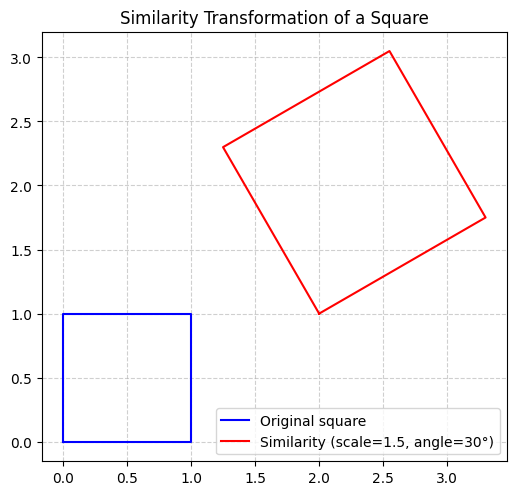

In [ ]:

# -*- coding: utf-8 -*-
"""similarity_transform

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1EO0X1yr9OqNoZAh-NWF1rNJoPqeUM2iK
"""

import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, radians

def similarity_matrix(theta_deg, scale, t=(0,0)):
    """Return 2x3 similarity transform matrix"""
    theta = radians(theta_deg)
    R = np.array([[cos(theta), -sin(theta)],
                  [sin(theta),  cos(theta)]])
    M = scale * R  # scaled rotation
    t = np.array(t).reshape(2,1)
    M2x3 = np.hstack([M, t])  # 2x3 affine
    return M2x3

def apply_transform(points, M2x3):
    """Apply 2x3 transform to Nx2 points"""
    pts = np.asarray(points)
    out = pts @ M2x3[:,:2].T + M2x3[:,2]
    return out

# --- Original square ---
square = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

# --- Transformation params ---
scale = 1.5
angle = 30
translation = (2, 1)

# Build transform and apply
M = similarity_matrix(angle, scale, translation)
transformed = apply_transform(square, M)

# --- Plot ---
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-', label="Original square")
plt.plot(transformed[:,0], transformed[:,1], 'r-', label=f"Similarity (scale={scale}, angle={angle}°)")

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.title("Similarity Transformation of a Square")
plt.show()

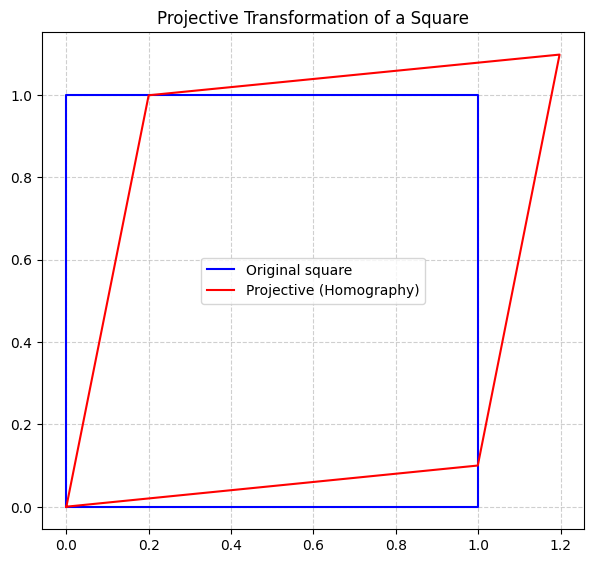

In [ ]:
# -*- coding: utf-8 -*-
"""projective_transform

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Z_gBLaNOzpgvCkXWAUNcrujhLhR2j47H
"""

import numpy as np
import matplotlib.pyplot as plt

def apply_homography(points, H):
    """
    Apply projective transformation (homography).
    points: (N,2) array of xy coords
    H: 3x3 homography matrix
    """
    pts_h = np.hstack([points, np.ones((points.shape[0],1))])   # (N,3)
    warped = pts_h @ H.T                                       # (N,3)
    warped /= warped[:,2].reshape(-1,1)                        # divide by lambda
    return warped[:,:2]

# --- Original square ---
square = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

# --- Example projective matrix (warp into trapezoid) ---
H = np.array([[1, 0.2, 0],
              [0.1, 1, 0],
              [0.001, 0.001, 1]])

projected = apply_homography(square, H)

# --- Plot ---
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-', label="Original square")
plt.plot(projected[:,0], projected[:,1], 'r-', label="Projective (Homography)")

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.title("Projective Transformation of a Square")
plt.show()

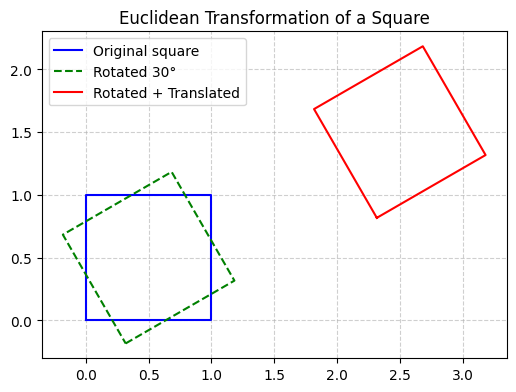

In [ ]:
# -*- coding: utf-8 -*-
"""euclidean_transform

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1olaLD2_sqiMwfOqx8LauqvxHGI9cZvST
"""

import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, radians

def rotation_matrix(theta_deg):
    theta = radians(theta_deg)
    return np.array([[cos(theta), -sin(theta)],
                     [sin(theta),  cos(theta)]])

# --- Original square (centered at origin for clarity) ---
square = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])  # closed square

# --- Transformation params ---
tx, ty = 2, 1          # translation
angle = 30             # rotation angle (deg)
center = np.array([0.5, 0.5])  # rotate about square's center

# --- Apply rotation about center ---
R = rotation_matrix(angle)
rotated = (square - center) @ R.T + center

# --- Apply translation ---
translated = rotated + np.array([tx, ty])

# --- Plot ---
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-', label="Original square")
plt.plot(rotated[:,0], rotated[:,1], 'g--', label=f"Rotated {angle}°")
plt.plot(translated[:,0], translated[:,1], 'r-', label="Rotated + Translated")

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.title("Euclidean Transformation of a Square")
plt.show()

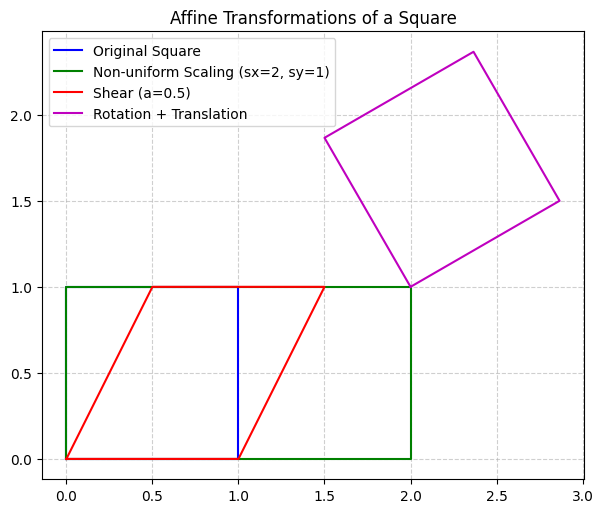

In [ ]:
# -*- coding: utf-8 -*-
"""affine_transform

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1to6YQw2_1G0jep_JqtdKGrjb2O16wNJM
"""

import numpy as np
import matplotlib.pyplot as plt

def apply_affine(points, A, t):
    """
    Apply affine transformation: x' = A x + t
    points: (N,2)
    A: 2x2 matrix
    t: 2x1 translation vector
    """
    pts = np.asarray(points)
    return pts @ A.T + t

# --- Original square ---
square = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

# --- Examples of affine matrices ---
# 1. Non-uniform scaling
A_scale = np.array([[2.0, 0.0],
                    [0.0, 1.0]])
t_scale = np.array([0,0])
scaled = apply_affine(square, A_scale, t_scale)

# 2. Shear
A_shear = np.array([[1.0, 0.5],   # shear in x by factor 0.5
                    [0.0, 1.0]])
t_shear = np.array([0,0])
sheared = apply_affine(square, A_shear, t_shear)

# 3. Rotation + Translation (still affine)
theta = np.radians(30)
A_rot = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
t_rot = np.array([2,1])  # translation
rot_trans = apply_affine(square, A_rot, t_rot)

# --- Plot results ---
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-', label="Original Square")
plt.plot(scaled[:,0], scaled[:,1], 'g-', label="Non-uniform Scaling (sx=2, sy=1)")
plt.plot(sheared[:,0], sheared[:,1], 'r-', label="Shear (a=0.5)")
plt.plot(rot_trans[:,0], rot_trans[:,1], 'm-', label="Rotation + Translation")

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.title("Affine Transformations of a Square")
plt.show()